In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import time
#import random
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# S0      : Initial price
# div     : Dividend yield (delta)
# sigma   : Volatility
# r       : Rate of interest
# K       : Strike price
# N       : Number of time steps (Choose even numbers for simplicity)
# M       : Number of realisations
# Tm      : Time to maturity [years]

S0      = 100
Tm      = 1
div     = 0.03 
r       = 0.06
sigma   = 0.2
K       = 100
N       = 50
M       = 500000
#Set seed here.

$$\ S _{t+\Delta t} = \ S_{t} e^{(\nu\Delta t+ \sigma\varepsilon\sqrt{\Delta t})}$$ 

$$\nu = r-\delta-\frac{1}{2}\sigma^{2}$$

In [3]:
def black_scholes_monte_carlo(S0, Tm, div, r, sigma, K, N, M, CALL = 'T', antithetic = 'F'):
    # Compute constants
    dt    = Tm/N
    nu_dt = (r - div - 0.5 * sigma ** 2) * dt 
    
    # Choose between non-antithetic and antithetic case.
    if antithetic == 'F':
        # Generate a random normal sample.
        normal_sample = np.random.randn(N + 1, M)
        # Generate price random walks
        S    = S0 * np.exp(np.cumsum(nu_dt + sigma * np.sqrt(dt) * normal_sample, axis = 0))
        S[0] = S0
        # Save a few sample paths for visualisation.
        sample_paths = S[:, np.random.randint(S.shape[0], size = 20)]
        
        if CALL == 'T': 
            values = np.maximum(0, S[-1] - K)
        else: # PUT Option
            values = np.maximum(0, K - S[-1]) 
    else: 
        normal_sample = np.random.randn(N + 1, M)
        S1    = S0 * np.exp(np.cumsum(nu_dt + sigma * np.sqrt(dt) * normal_sample, axis = 0))
        S2    = S0 * np.exp(np.cumsum(nu_dt + sigma * np.sqrt(dt) * -normal_sample, axis = 0))
        S1[0] = S0
        S2[0] = S0
        # Save a few sample paths for visualisation. Choice of S1 or S2 is inconsequential.
        sample_paths = S1[:, np.random.randint(S1.shape[0], size = 20)] 
        
        if CALL == 'T':
            values = 0.5 * (np.maximum(0, S1[-1] - K) + np.maximum(0, S2[-1] - K))
        else:
            values = 0.5 * (np.maximum(0, K - S1[-1]) + np.maximum(0, K - S2[-1]))
            
    option_value = np.mean(values * np.exp(-r * Tm))
    return sample_paths, option_value

In [4]:
sample_paths, option_value = black_scholes_monte_carlo(S0, Tm, div, r, sigma, K, N, M, CALL = 'F', antithetic = 'T')

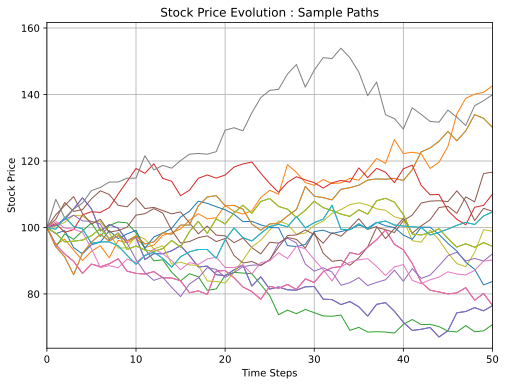

In [5]:
# Plot 20 randomly selected paths
plt.figure(figsize = [8,6])
plt.plot(sample_paths, lw = 1)
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('Stock Price Evolution : Sample Paths')
plt.grid()
plt.xlim(0,N)
plt.ylim(0.95 * sample_paths.min(), 1.05 * sample_paths.max())
plt.show()

In [6]:
option_value

6.326808586014168